In [3]:
!pip install pandas

  Using cached pandas-2.1.3-cp310-cp310-macosx_11_0_arm64.whl (10.9 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import pickle
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from genetic import fitness

In [3]:
def is_valid(g, s):
    return all(sum(s[v_int] for v in g[n] if (v_int := int(v))) >= 2
               for n in g
               if (n_int := int(n)) and not s[n_int])


### Experimento 4

In [50]:
results = "../results_4"

data = defaultdict(dict)

for filename in os.listdir(results):
    if filename.endswith('.graphml'):
        file_path = os.path.join(results, filename)
        G = nx.read_graphml(file_path)
        index = int(filename.split('.')[0])
        data[index]['g'] = G
    if filename.endswith('.pkl'):
        file_path = os.path.join(results, filename)
        with open(file_path, 'rb') as file:
            r = pickle.load(file)
            index = int(filename.split('.')[0])
            data[index].update(r)

data = pd.DataFrame(data).T
data.sort_index(inplace=True)
data.dropna(inplace=True)
data

,alg,alg_t,gen,gen_t
2,"{1, 0}",0.000049,"{0, 1}",8.5144
4,"{1, 2, 3}",0.000058,"{0, 1, 2, 3}",8.960209
8,"{4, 2, 1, 7, 6}",0.000136,"{0, 1, 2, 4, 6, 7}",9.923481
16,"{12, 3, 13, 9, 2, 14, 1, 7, 0, 5, 10}",0.000167,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",12.179227
32,"{4, 6, 2, 24, 31, 30, 18, 8, 22, 7, 15, 13, 28...",0.000354,"{0, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17,...",16.642036
64,"{4, 62, 55, 2, 57, 24, 47, 31, 42, 45, 30, 60,...",0.001001,"{2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 16, 18, 20,...",25.415034
128,"{56, 6, 104, 57, 86, 85, 98, 75, 99, 58, 120, ...",0.003483,"{0, 1, 3, 4, 6, 8, 11, 12, 13, 14, 15, 16, 17,...",44.47936
256,"{56, 55, 246, 57, 186, 85, 175, 121, 128, 224,...",0.011441,"{4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 20...",79.925798
512,"{438, 86, 446, 372, 392, 324, 224, 198, 120, 4...",0.044056,"{0, 1, 2, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17,...",153.833141
1024,"{665, 971, 817, 672, 104, 57, 949, 86, 619, 89...",0.172413,"{3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 17, 19, 20,...",305.80654


In [51]:
results = "../results_2"

g_data = defaultdict(dict)

for filename in os.listdir(results):
    if filename.endswith('.graphml'):
        file_path = os.path.join(results, filename)
        G = nx.read_graphml(file_path)
        index = int(filename.split('.')[0])
        g_data[index]['g'] = G

g_data = pd.DataFrame(g_data).T
g_data.sort_index(inplace=True)
g_data.dropna(inplace=True)
g_data

,g
2,"(0, 1)"
4,"(0, 1, 2, 3)"
8,"(0, 1, 2, 3, 4, 5, 6, 7)"
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
64,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
128,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
256,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1024,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [52]:
data = data.merge(g_data, left_index=True, right_index=True)
data

,alg,alg_t,gen,gen_t,g
2,"{1, 0}",0.000049,"{0, 1}",8.5144,"(0, 1)"
4,"{1, 2, 3}",0.000058,"{0, 1, 2, 3}",8.960209,"(0, 1, 2, 3)"
8,"{4, 2, 1, 7, 6}",0.000136,"{0, 1, 2, 4, 6, 7}",9.923481,"(0, 1, 2, 3, 4, 5, 6, 7)"
16,"{12, 3, 13, 9, 2, 14, 1, 7, 0, 5, 10}",0.000167,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",12.179227,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
32,"{4, 6, 2, 24, 31, 30, 18, 8, 22, 7, 15, 13, 28...",0.000354,"{0, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17,...",16.642036,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
64,"{4, 62, 55, 2, 57, 24, 47, 31, 42, 45, 30, 60,...",0.001001,"{2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 16, 18, 20,...",25.415034,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
128,"{56, 6, 104, 57, 86, 85, 98, 75, 99, 58, 120, ...",0.003483,"{0, 1, 3, 4, 6, 8, 11, 12, 13, 14, 15, 16, 17,...",44.47936,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
256,"{56, 55, 246, 57, 186, 85, 175, 121, 128, 224,...",0.011441,"{4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 20...",79.925798,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
512,"{438, 86, 446, 372, 392, 324, 224, 198, 120, 4...",0.044056,"{0, 1, 2, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17,...",153.833141,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1024,"{665, 971, 817, 672, 104, 57, 949, 86, 619, 89...",0.172413,"{3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 17, 19, 20,...",305.80654,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [53]:
def a_is_valid(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return is_valid(d['g'], s_list)

def a_fitness(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return fitness(d['g'], s_list)

In [54]:
data

,alg,alg_t,gen,gen_t,g
2,"{1, 0}",0.000049,"{0, 1}",8.5144,"(0, 1)"
4,"{1, 2, 3}",0.000058,"{0, 1, 2, 3}",8.960209,"(0, 1, 2, 3)"
8,"{4, 2, 1, 7, 6}",0.000136,"{0, 1, 2, 4, 6, 7}",9.923481,"(0, 1, 2, 3, 4, 5, 6, 7)"
16,"{12, 3, 13, 9, 2, 14, 1, 7, 0, 5, 10}",0.000167,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",12.179227,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
32,"{4, 6, 2, 24, 31, 30, 18, 8, 22, 7, 15, 13, 28...",0.000354,"{0, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17,...",16.642036,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
64,"{4, 62, 55, 2, 57, 24, 47, 31, 42, 45, 30, 60,...",0.001001,"{2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 16, 18, 20,...",25.415034,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
128,"{56, 6, 104, 57, 86, 85, 98, 75, 99, 58, 120, ...",0.003483,"{0, 1, 3, 4, 6, 8, 11, 12, 13, 14, 15, 16, 17,...",44.47936,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
256,"{56, 55, 246, 57, 186, 85, 175, 121, 128, 224,...",0.011441,"{4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 20...",79.925798,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
512,"{438, 86, 446, 372, 392, 324, 224, 198, 120, 4...",0.044056,"{0, 1, 2, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17,...",153.833141,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1024,"{665, 971, 817, 672, 104, 57, 949, 86, 619, 89...",0.172413,"{3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 17, 19, 20,...",305.80654,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [55]:
data['alg_f'] = data.apply(a_fitness, axis=1, args=('alg', ))
data['gen_f'] = data.apply(a_fitness, axis=1, args=('gen', ))
data['gen_v'] = data.apply(a_is_valid, axis=1, args=('gen', ))
data

valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=0
valid_non_s=0 leafs_on_s=1
valid_non_s=0 leafs_on_s=2
valid_non_s=2 leafs_on_s=4
valid_non_s=5 leafs_on_s=8
valid_non_s=9 leafs_on_s=14
valid_non_s=15 leafs_on_s=31
valid_non_s=30 leafs_on_s=56
valid_non_s=54 leafs_on_s=107
valid_non_s=100 leafs_on_s=228
valid_non_s=193 leafs_on_s=465
valid_non_s=362 leafs_on_s=874
valid_non_s=693 leafs_on_s=1794
valid_non_s=1365 leafs_on_s=3591


,alg,alg_t,gen,gen_t,g,alg_f,gen_f,gen_v
2,"{1, 0}",0.000049,"{0, 1}",8.5144,"(0, 1)",0,1,True
4,"{1, 2, 3}",0.000058,"{0, 1, 2, 3}",8.960209,"(0, 1, 2, 3)",0,2,True
8,"{4, 2, 1, 7, 6}",0.000136,"{0, 1, 2, 4, 6, 7}",9.923481,"(0, 1, 2, 3, 4, 5, 6, 7)",0,6,True
16,"{12, 3, 13, 9, 2, 14, 1, 7, 0, 5, 10}",0.000167,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",12.179227,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,13,True
32,"{4, 6, 2, 24, 31, 30, 18, 8, 22, 7, 15, 13, 28...",0.000354,"{0, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17,...",16.642036,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,23,False
64,"{4, 62, 55, 2, 57, 24, 47, 31, 42, 45, 30, 60,...",0.001001,"{2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 16, 18, 20,...",25.415034,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,46,False
128,"{56, 6, 104, 57, 86, 85, 98, 75, 99, 58, 120, ...",0.003483,"{0, 1, 3, 4, 6, 8, 11, 12, 13, 14, 15, 16, 17,...",44.47936,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,86,False
256,"{56, 55, 246, 57, 186, 85, 175, 121, 128, 224,...",0.011441,"{4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 20...",79.925798,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,161,False
512,"{438, 86, 446, 372, 392, 324, 224, 198, 120, 4...",0.044056,"{0, 1, 2, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17,...",153.833141,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,328,False
1024,"{665, 971, 817, 672, 104, 57, 949, 86, 619, 89...",0.172413,"{3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 17, 19, 20,...",305.80654,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,658,False


In [56]:
dt = data.iloc[10]
s = dt.alg
s_list = [n in s for n in dt.g]
fitness(dt.g, s_list)

valid_non_s=693 leafs_on_s=874


1567

In [57]:
s_list

[True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 

<Axes: >

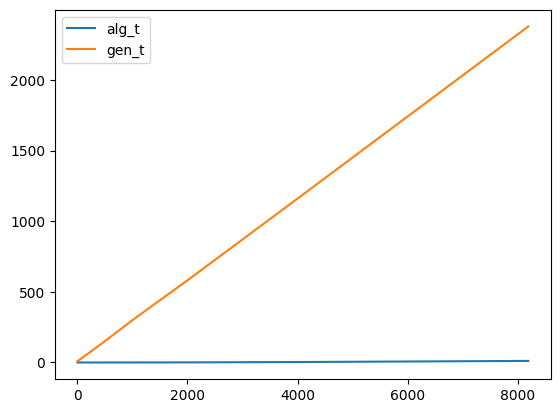

In [58]:
data[["alg_t", "gen_t"]].plot()

<Axes: >

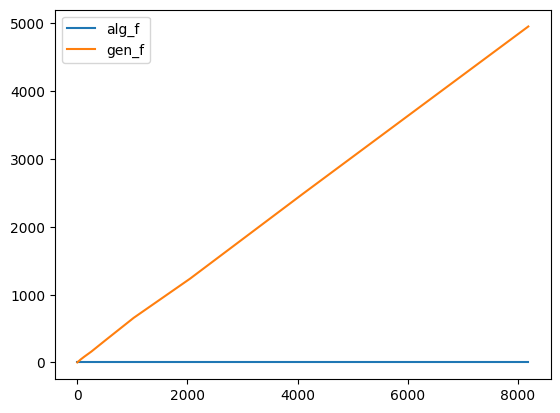

In [59]:
data[["alg_f", "gen_f"]].plot()

In [60]:
data.to_csv('a3')